In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [2]:
#reading from csv file consisting of types and posts.
data_set=pd.read_csv("mbtidataset2.csv")
data_set.tail()

,type,posts
1436,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
1437,ENFP,'So...if this thread already exists someplace ...
1438,INTP,'So many questions when i do these things. I ...
1439,INFP,'I am very conflicted right now when it comes ...
1440,INFP,'It has been too long since I have been on per...


In [3]:
data_set.isnull().any() #checking for null values in the dataset

type     False
posts    False
dtype: bool

In [4]:
data_set.shape  #Counting Number Of rows and columns in the dataset

(1441, 2)

In [5]:
data_set.iloc[0,1].split('|||') #splitting the posts of different types that are separated with ||| .

["'For some reason, even thought I'm not here for a long time and I don't quite know the people here, you,CompassionateMisanthrope, has always been my favorite poster in this forum, something in the way...",
 "Ha! Nobody could describe it better! I've been going through a bad phase, and that's exactly what's happening. Every single word. (although I'm in a good mood today)  Three days ago I broke my...",
 'ENFPs are just hungry. Hungry for a lot of things. Intensity, love, fun, food, all kinds of things, and sometimes power.  Is just that power is evil, man.',
 'She could say this, these are great words, really. But that only shows the will to understand, not the understanding she wants. :)',
 'The feeling of somehow influencing someones decisions over the internet is a weird thing. I think about the Lorenz attractor and the butterfly effect, I think that somehow my life has some meaning, a...',
 "You're certainly a gentleman ;b, and hell, that's a story to be proud of, not embarrassed

In [6]:
len(data_set.iloc[1,1].split('|||'))

50

In [7]:
types=np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [8]:
total=data_set.groupby(['type']).count()*50
total

,posts
type,
ENFJ,1450
ENFP,6200
ENTJ,2200
ENTP,5200
ESFJ,300
ESFP,300
ESTJ,400
ESTP,700
INFJ,12150


Text(0.5, 1.0, 'Total posts for each personality type')

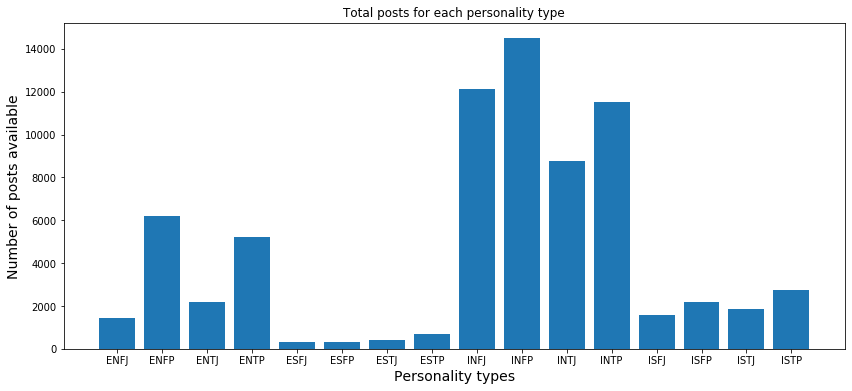

In [9]:
#graphical representation of available data
plt.figure(figsize=(14,6))
plt.bar(np.array(total.index),height=total['posts'],)
plt.xlabel('Personality types',size=14)
plt.ylabel('Number of posts available',size=14)
plt.title('Total posts for each personality type')

In [10]:
all_posts=pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2=[]
    for i in temp1:
        temp2+=i.split('|||')
    temp3=pd.Series(temp2)
    all_posts[j]=temp3    

In [11]:
all_posts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",'https://www.youtube.com/watch?v=b5S3zcNysAU,'My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,'https://i.pinimg.com/736x/a8/32/5f/a8325f249a...,'8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...",[URL=http://img21.imageshack.us/i/hugmebro.jpg...,"'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",http://images.cheezburger.com/completestore/20...,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,http://i.imgur.com/GACoRuy.jpg I'm a PEACEMAKE...,"Awww, well you always have a best-friend, you ...",Ugh ... (shudders),http://www.youtube.com/watch?v=lh91NFMiCvg ha...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),https://www.youtube.com/watch?v=SRcZ-BBikfQ,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...


In [12]:
all_posts.shape #number of rows and columns present in the dataset

(1454, 16)

In [13]:
all_posts.shape[0] #number of rows present in the dataset

1454

In [14]:
#replacing all the http links with space 
for j in types:
     all_posts[j]=all_posts[j].str.replace('https?://(i\.)?(www\.)?(\w+)(\.\w+)(\/)(\w+)(\S+)','',case=False)
all_posts.head()  

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...",[URL=http://img21.imageshack.us/i/hugmebro.jpg...,"'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",http://images.cheezburger.com/completestore/20...,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...


In [15]:
#replacing remaining urls.
for j in types:
    all_posts[j]=all_posts[j].str.replace('https?://(\w+\.)?(\S+.)','',case=False)
all_posts.head()  

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...","[URL= Whew! Thought I was the only one! Oh, ...","'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",ow and hello,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...


In [16]:
#storing the updated file after removing all urls into a new file.
mp = pd.DataFrame(all_posts)
mp.to_csv('convertedfile5.csv', index=False)

In [17]:
#now reading the updated file.
newdataset=pd.read_csv('convertedfile5.csv')
newdataset.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...","[URL= Whew! Thought I was the only one! Oh, ...","'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",ow and hello,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),NaN,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...


In [18]:
#checking for null values present in the dataset.
newdataset.isnull().any()

ENFJ    True
ENFP    True
ENTJ    True
ENTP    True
ESFJ    True
ESFP    True
ESTJ    True
ESTP    True
INFJ    True
INFP    True
INTJ    True
INTP    True
ISFJ    True
ISFP    True
ISTJ    True
ISTP    True
dtype: bool

In [19]:
#number of rows and columns present in the new dataset.
newdataset.shape


(1454, 16)

In [20]:
#Replacing all null values in the dataset with hiphen
newdataset.fillna("-", inplace = True)  

In [21]:
newdataset.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...","[URL= Whew! Thought I was the only one! Oh, ...","'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",ow and hello,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),-,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...


In [22]:
newdataset.shape

(1454, 16)

In [23]:
 newdataset=newdataset.dropna()

In [24]:
newdataset.isnull().any()


ENFJ    False
ENFP    False
ENTJ    False
ENTP    False
ESFJ    False
ESFP    False
ESTJ    False
ESTP    False
INFJ    False
INFP    False
INTJ    False
INTP    False
ISFJ    False
ISFP    False
ISTJ    False
ISTP    False
dtype: bool

In [25]:
newdataset.shape

(1454, 16)

In [26]:
end=newdataset.shape[0]
newdataset.iloc[0:end]

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...","[URL= Whew! Thought I was the only one! Oh, ...","'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",ow and hello,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),-,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,I am VERY particular. And I have not dated cer...,I didn't start this conversation?O.O And umm.....,"Damn, I forgot to reply. Roses are red Viole.

In [27]:
newdataset.shape

(1454, 16)

In [28]:
xp = pd.DataFrame(newdataset)
xp.to_csv('convertedfile6.csv', index=False)

In [29]:
#Cleaned dataset.
finaldataset=pd.read_csv('convertedfile6.csv')
finaldataset.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'So what if a person really cares about you an...,"'For some reason, even thought I'm not here fo...",','My not extremely fleshed out theory about the...,"'Only from family now really, the occasional o...",'bluekitdon I never thought about it that wa...,','8 months have passed since i last took a visi...,"'When I was younger, I used to regularly contr...","[URL= Whew! Thought I was the only one! Oh, ...","'Used to be kind of, not really anymore. But i...",'1. Let everyone believe they're dealing with ...,Hello and welcome! Hope you enjoy your time he...,'Hi! I've heard a lot that ISFPs and ENFJs ar...,'I have found rings I like better on walmart.c...,'John Wayne swagger? I'm going to assume that ...
1,#2 definitely. I don't like to talk about myse...,Ha! Nobody could describe it better! I've been...,This is difficult but these are the first arti...,Lol two articles that essentially say the same...,Very much so; anyway I sent a message a few da...,thismustbetheplace Before I would smile and g...,"Nope, never speak of politics. BTW democratic...",ow and hello,I regularly help out at my church's Drop-In fo...,My Little Pony: Friendship is Magic... Did I win?,I don't mean that the questionnaire completely...,How would you tell apart an ESTP from an ENTJ ...,Nice! Personality types really are interesting...,"BlueChristmas06 Art is life, yo! What a beauti...",I didn't expect this much of a response. I'm n...,I played the hell out of legos. And building b...
2,Wow. I wasn't expecting this much of a discuss...,ENFPs are just hungry. Hungry for a lot of thi...,I think it is perfectly acceptable to give a w...,"At the very least, I consider '94 Gen Y. At my...",Yeah I know I have no idea. I'm going to messa...,I have a really AWFUL past. I ruined friendshi...,"I'm a PEACEMAKER, but my emotions are rather ...","Awww, well you always have a best-friend, you ...",Ugh ... (shudders),haunting...,"Good test! I got 13 social, 23 self-pres, and ...",I am excited. I just got out of a successful ...,Hello Loyalknight and welcome to PerC! :D For...,goodthankyou That makes so much sense now that...,I don't want to hurt his feelings but I really...,Dark humor is pretty much a minimum requiremen...
3,She HAS told me she is lonely. I know the diff...,"She could say this, these are great words, rea...",I had an iPad gen 2 that I replaced with a Gal...,"I should clarify that by abstract, I meant 5w4...",Being alone mainly. I hate being stuck in on a...,<-- I accept it now. :wink: Thanksssss =),-,Amen to that brother,I've been in a customer service position in an...,I somewhat just dropped out of the game per sa...,"The test itself, in my opinion, is pretty good...",You're dangerously close. It was about drugs. ...,Hello and welcome! Hope you'll enjoy your time...,That last post was a reply for aniareilean . I...,Sometimes I wonder if I'm more ISFJ. Its easy ...,Okay. Rewrite this sentence.
4,It's not about being alone. It's that she is l...,The feeling of somehow influencing someones de...,Talking to someone about the pronunciation of ...,I think it's easy to misinterpret dependence o...,It gets easier. I can't help but wonder how ma...,"Really? I'm surprised. Hmmm. I mean, it makes ...",I've listened to the audiobook version of In T...,damn.........ESTP lady Sorry dudes your on yo...,"I don't mind deadlines, particularly if they a...","I KNOW THAT FEEL BRA... But yeah, its a drag ...",1w9: Easier to get along with and have more qu...,You have already received some good advice. Be...,Hello and welcome Mouse! :D,Well...I dunno...maybe? I think that I would k...,I'm starting to think I'm more of a Nurturer t...,This one of those occasions? I'd like to see...
